In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = keras.utils.to_categorical(y_train, num_classes =10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print("shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("shape of test data:")
print(x_test.shape)
print(y_test.shape)

shape of training data:
(50000, 32, 32, 3)
(50000, 10)
shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import ReLU

In [5]:
#creating the model
#building a linear stack of layers with the sequential model
model = Sequential()

#convolution layer 1
model.add(Conv2D(25, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape=(32,32,3)))

#convolution layer 2
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(70, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        700       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 50)        11300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 70)        31570     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 70)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 70)          0

In [6]:
#compiling the model    
#categorical_crossentropy ( cce ) uses a one-hot array to calculate the probability 
#adam - combination of both RMS and SGD
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [8]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32) 
# Final evaluation of the model 
scores = model.evaluate(x_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
1563/1563 [==============================] - 57s 37ms/step - loss: 0.2277 - accuracy: 0.9291 - val_loss: 0.8113 - val_accuracy: 0.7774
Epoch 2/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2262 - accuracy: 0.9310 - val_loss: 0.7830 - val_accuracy: 0.7753
Epoch 3/100
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2269 - accuracy: 0.9291 - val_loss: 0.7767 - val_accuracy: 0.7827
Epoch 4/100
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2348 - accuracy: 0.9286 - val_loss: 0.7833 - val_accuracy: 0.7795
Epoch 5/100
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2277 - accuracy: 0.9293 - val_loss: 0.7501 - val_accuracy: 0.7817
Epoch 6/100
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2241 - accuracy: 0.9299 - val_loss: 0.7755 - val_accuracy: 0.7795
Epoch 7/100
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2273 - accuracy: 0.9305 - val_loss: 0

In [27]:
#This will create an HDF5 file with the name ‘project_model’  and extension ‘.h5’. Hierarchical Data Format (HDF) 
from keras.models import load_model 
model.save('project_model.h5')

In [28]:
#loading the saved model 
from keras.models import load_model 
model = load_model('project_model.h5')

In [35]:
import numpy as np 
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =image.load_img('C://Users//WoU_AI_ML//Documents//4.jfif',target_size =(32,32))

In [36]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Horse


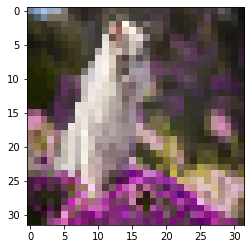

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)